**Q3.Validation of ARIMA model on 100 most recent days.**


In [1]:
import pandas as pd
from matplotlib import pyplot
%matplotlib inline

In [3]:
df=pd.read_csv('Daily_Gold_Price_on_World.csv')
df['Date']=pd.to_datetime(df['Date'])

Made a new dataset which contained only the prices of India and dates so that task can be done easily.

In [9]:
df2=df[['Date','Indian rupee (INR)']]
from google.colab import files

df2.to_csv('Only_India_Daily.csv', encoding = 'utf-8-sig',index=False) 
files.download('Only_India_Daily.csv')
df2.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Date,Indian rupee (INR)
0,1979-01-01,0.00
1,1979-01-02,1792.85
2,1979-01-03,1802.15
3,1979-01-04,1811.74
4,1979-01-05,1843.57


Date
1979-01-01       0.00
1979-01-02    1792.85
1979-01-03    1802.15
1979-01-04    1811.74
1979-01-05    1843.57
Name: Indian rupee (INR), dtype: float64


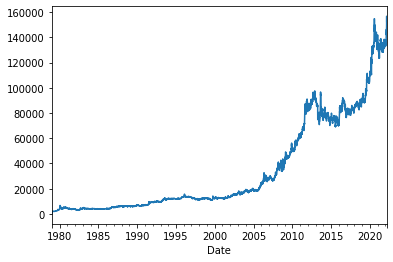

In [54]:
series = pd.read_csv('Only_India_Daily.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
print(series.head())
series.plot()
pyplot.show()

In [ ]:
!pip install statsmodels

Analysis based on the ARIMA model

                              ARIMA Model Results                               
Dep. Variable:     D.Indian rupee (INR)   No. Observations:                11269
Model:                   ARIMA(5, 1, 0)   Log Likelihood              -86705.923
Method:                         css-mle   S.D. of innovations            531.264
Date:                  Tue, 05 Apr 2022   AIC                         173425.847
Time:                          17:41:52   BIC                         173477.155
Sample:                      01-31-1979   HQIC                        173443.112
                           - 03-31-2022                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         13.4494      4.696      2.864      0.004       4.246      22.653
ar.L1.D.Indian rupee (INR)    -0.0138      0.009     -1.467      0.

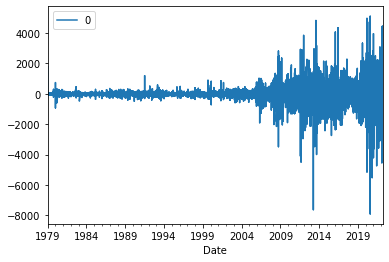

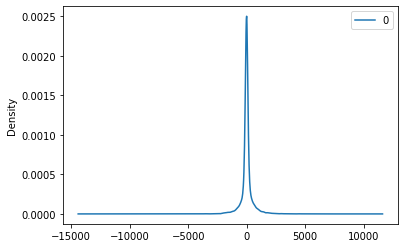

                  0
count  11269.000000
mean       0.007542
std      531.288341
min    -7899.497678
25%      -87.981669
50%      -11.046143
75%       74.831913
max     5102.736038


In [52]:
# from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_model import ARIMA
series.index = series.index.to_period('M')
# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

Used value of p,d,q as 5 1 0 respectively .Took this values after reading a blog on machine learning concept. Got the best predictions with this values . Tries with other values too but the values mentioned above gave the best answer.

Test data of size 0.01 which is approximately 100 days.
Hence validated the data on 100 days.

The red lines show the predicted value while the blue line shows the expected value.

predicted=130503.409532, expected=131946.700000
predicted=131912.762885, expected=131778.660000
predicted=131784.805883, expected=132967.150000
predicted=132942.815605, expected=132452.100000
predicted=132418.707172, expected=133482.800000
predicted=133468.500109, expected=134597.130000
predicted=134570.492309, expected=135366.830000
predicted=135379.350845, expected=133406.350000
predicted=133376.425586, expected=133202.020000
predicted=133149.214042, expected=134083.580000
predicted=134091.147113, expected=133132.200000
predicted=133228.366327, expected=133207.300000
predicted=133217.680291, expected=135456.010000
predicted=135437.742452, expected=135551.710000
predicted=135599.179593, expected=133849.300000
predicted=133839.494778, expected=134690.880000
predicted=134610.118862, expected=135131.750000
predicted=135150.574221, expected=132476.160000
predicted=132558.308013, expected=134305.220000
predicted=134278.632157, expected=133724.230000
predicted=133754.533505, expected=131317

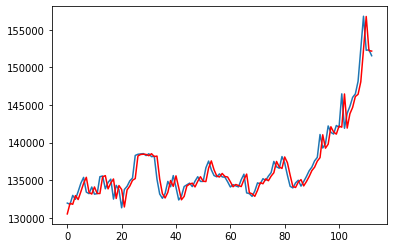

In [55]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt
series.index = series.index.to_period('M')
# split into train and test sets
X = series.values
size = int(len(X) * 0.99)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
mae=mean_absolute_error(test,predictions)
rmse = sqrt(mean_squared_error(test, predictions))
mape=mean_absolute_percentage_error(test,predictions)
print('Test RMSE: %.3f' % rmse)
print('Test MAE: %.3f' % mae)
print('Test MAPE: %.3f' % mape)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

**Q4.Prediction for the next 20 days from the Data.**

Used the ARIMA model and appended the predicted data in the history data for getting the new history and predicting the next day's price.

The last day present in our training dataset was 11-03-2022 . So the data is predicted for next 20 days from 11-03-2022.

predicted=151464.788585


/usr/local/lib/python3.7/dist-packages/statsmodels/base/data.py:629: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  endog = np.asarray(endog)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:424: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  _endog = endog if hasattr(endog, 'ndim') else np.asarray(endog)


predicted=151615.698747
predicted=151656.966259
predicted=151698.481720
predicted=151717.743763
predicted=151726.569321
predicted=151738.119828
predicted=151750.433130
predicted=151763.621608
predicted=151777.235627
predicted=151790.789377
predicted=151804.290526
predicted=151817.759587
predicted=151831.210804
predicted=151844.662863
predicted=151858.117404
predicted=151871.548858
predicted=151885.006793
predicted=151898.453477
predicted=151911.910609


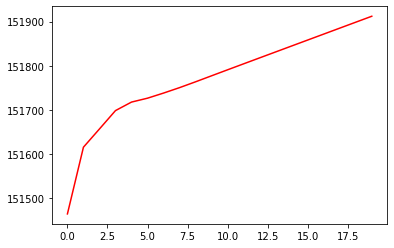

In [44]:
from sklearn.metrics import mean_squared_error
from math import sqrt
series.index = series.index.to_period('M')
X = series.values
train=X
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(20):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	history.append(yhat)
	print('predicted=%f' % (yhat))
pyplot.plot(predictions, color='red')
pyplot.show()